In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_csv('../data/LULU_max_2024-05-28_2024-05-31_1m.csv')

# Define features and target
X = data.drop(columns=['Close'])
y = data['Close']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
!pip install xgboost shap

Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
DayOfWeek          int32
TimeInMinutes      int32
dtype: object


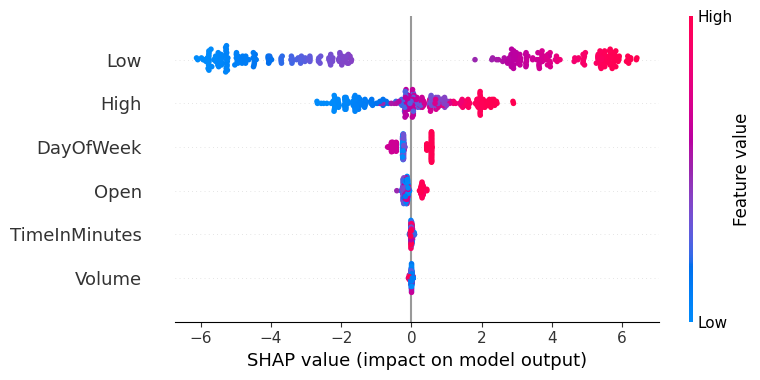

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
import shap

# Load your dataset
data = pd.read_csv('../data/LULU_max_2024-05-28_2024-05-31_1m.csv')

# Convert the 'Date' column to datetime
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Extract useful features: day of the week and time in minutes
data['DayOfWeek'] = data['Datetime'].dt.dayofweek  # Monday=0, Sunday=6
data['TimeInMinutes'] = data['Datetime'].dt.hour * 60 + data['Datetime'].dt.minute  # Total minutes since midnight

# Optionally drop the original date column if not needed
data.drop(columns=['Datetime','Adj Close'], inplace=True)


# Check data types
print(data.dtypes)

# Encode categorical features if necessary
data = pd.get_dummies(data, drop_first=True)  # This will convert categorical variables to dummy variables

# Ensure to use the correct target column name
y = data['Close']  # Use the actual column name for the stock price
X = data.drop(columns=['Close'])  # Drop the target column from features

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror')
model.fit(X_train, y_train)

# Create a SHAP explainer
explainer = shap.Explainer(model)

# Compute SHAP values for the test set
shap_values = explainer(X_test)

# Visualize the SHAP values
shap.summary_plot(shap_values, X_test)



## explain the plot

Certainly! When using SHAP (SHapley Additive exPlanations) to analyze the output of your model, the summary plot provides valuable insights into feature importance and the effect of each feature on the model's predictions. Let’s break down the summary plot generated by `shap.summary_plot(shap_values, X_test)`:

### Understanding the SHAP Summary Plot

1. **Axes**:
   - **X-Axis (SHAP Value)**: This axis represents the SHAP values for each feature, indicating how much each feature contributes to the model's output (i.e., the predicted stock price). A positive SHAP value increases the predicted stock price, while a negative value decreases it.
   - **Y-Axis (Features)**: Each feature is listed on this axis. Features are typically sorted in descending order of importance based on their average absolute SHAP values.

2. **Points**:
   - Each point in the plot represents a SHAP value for a specific feature and a specific observation (data point) in the test set. The horizontal position of the point shows the impact of the feature on the prediction:
     - Points to the right indicate a positive impact (the feature value contributes to an increase in the predicted stock price).
     - Points to the left indicate a negative impact (the feature value contributes to a decrease in the predicted stock price).

3. **Color**:
   - The color of the points typically represents the feature value:
     - **Red** indicates higher values of the feature.
     - **Blue** indicates lower values of the feature.
   - This color coding helps visualize the relationship between feature values and their corresponding SHAP values. For example, if a feature is red and mostly to the right, it means higher values of that feature generally lead to higher predicted stock prices.

4. **Distribution**:
   - The spread of points for each feature provides insights into the variability of feature impacts across different observations. A wide spread indicates that the feature has a varying influence on the model's predictions, while a narrow spread suggests consistent influence.

5. **Feature Importance**:
   - Features at the top of the plot are the most important ones, as they have a higher average absolute SHAP value. You can prioritize your analysis and feature selection efforts based on these results.

### Example Interpretation

Let’s say your SHAP summary plot shows the following features:

- **Feature A**: Predominantly to the right and colored red, suggesting that higher values of Feature A contribute significantly to an increase in stock price predictions.
- **Feature B**: Distributed more evenly around zero but with some points to the left, indicating that while Feature B has some negative contributions, its impact is less consistent than that of Feature A.
- **Feature C**: Mostly blue and to the left, meaning that lower values of Feature C contribute to decreasing stock prices.

### Conclusion

The SHAP summary plot is a powerful visualization tool that helps you understand which features are driving your model's predictions and how they do so. This insight can guide you in feature selection, model refinement, and business decision-making. 

If you have any specific questions about interpreting the plot or need help with a particular feature or aspect of your analysis, feel free to ask!

In [1]:
import pandas as pd

# Example stock price data (could be from a CSV, API, etc.)
prices = pd.Series([100, 102, 101, 105, 107, 110, 308, 109, 112, 115, 116, 118] * 10)  # A series of stock prices

# Step 1: Calculate daily (or any other frequency) returns
returns = prices.pct_change().dropna()

# Calculate the rolling standard deviation over a window (e.g., 20 days)
window = 20
volatility_ema = returns.ewm(span=window).std()

print(volatility_ema)


1           NaN
2      0.021075
3      0.025407
4      0.020232
5      0.017757
         ...   
115    0.680105
116    0.647748
117    0.616864
118    0.587661
119    0.559627
Length: 119, dtype: float64


In your code, `window=20` specifies the period (number of data points) over which the **Exponential Moving Average (EMA)** of the volatility is calculated. Specifically:

- **Exponential Moving Average**: The `ewm()` function in Pandas applies an exponentially weighted moving average, where more recent data points are given more weight than older data points. The `span=20` parameter controls how much weight is given to recent points. In this case, you're applying an exponentially weighted moving average to the **standard deviation** of returns over a period of 20 data points (in this case, 20 prices).

### What `window=20` does in this context:
- The volatility you're calculating is "smoothed" over the past 20 data points.
- The `span=20` means that the volatility calculation gives higher importance to the most recent data points, but still considers the past 20 periods.
- The EMA gives more weight to more recent returns while still capturing volatility trends over the last 20 data points.

### How it works:
- If you have 120 data points, the `ewm(span=20)` function will calculate an exponentially weighted moving standard deviation of returns for each point after the 20th data point (since `ewm()` is recursive and the first values are affected by initial conditions).
- For each point from the 21st onward, the function will compute a volatility value based on the last 20 data points (with more weight on recent points).

### Intuition:
- **Simple Moving Average (SMA)**: A regular moving average treats each data point equally (e.g., in a 20-point window, each point contributes equally to the final value).
- **Exponential Moving Average (EMA)**: The EMA places more weight on recent data points, making it more sensitive to recent price changes. This is useful for identifying changes in volatility more quickly.

### In summary:
With 120 data points, using `window=20` for the `ewm()` function applies an exponentially weighted standard deviation that adapts to recent volatility trends, emphasizing the last 20 data points but still smoothing across the entire dataset.


In [2]:
import pandas as pd

# Example stock price data (could be from a CSV, API, etc.)
prices = pd.Series([100, 102, 101, 105, 107, 110, 308, 109, 112, 115, 116, 118] * 10)  # A series of stock prices

# Step 1: Calculate daily (or any other frequency) returns
returns = prices.pct_change().dropna()

# Control the EMA weight with different parameters

# Option 1: Control using 'span'
volatility_span = returns.ewm(span=20).std()

# Option 2: Control using 'com' (center of mass)
volatility_com = returns.ewm(com=9).std()

# Option 3: Control using 'halflife'
volatility_halflife = returns.ewm(halflife=10).std()

# Option 4: Control using 'alpha' directly
volatility_alpha = returns.ewm(alpha=0.2).std()

# Adding to DataFrame
df = pd.DataFrame({
    'Prices': prices,
    'Returns': returns,
    'Volatility_Span': volatility_span,
    'Volatility_COM': volatility_com,
    'Volatility_Halflife': volatility_halflife,
    'Volatility_Alpha': volatility_alpha
})

print(df.tail())

     Prices   Returns  Volatility_Span  Volatility_COM  Volatility_Halflife  \
115     109 -0.646104         0.680105        0.687044             0.639216   
116     112  0.027523         0.647748        0.652691             0.617935   
117     115  0.026786         0.616864        0.619980             0.597338   
118     116  0.008696         0.587661        0.589123             0.577589   
119     118  0.017241         0.559627        0.559573             0.558362   

     Volatility_Alpha  
115          0.833083  
116          0.747772  
117          0.670734  
118          0.601848  
119          0.539437  


## How to control the weight of EMA?
Yes, you can control the weight applied to more recent values in an **Exponential Moving Average (EMA)** by adjusting the `span`, `com`, `halflife`, or `alpha` parameters in Pandas’ `ewm()` function.

Here’s how you can control the EMA weights:

### Parameters to Control EMA Weight:
1. **`span`**: This determines the "window size" (kind of) for the EMA. It defines the weight indirectly. A larger `span` gives more weight to older data points.
   - $ \alpha = \frac{2}{\text{span} + 1} $
   
2. **`com`** (Center of Mass): This gives a more direct control over the smoothing factor.
   - $ \alpha = \frac{1}{\text{com} + 1} $

3. **`halflife`**: Defines the period in which the weight of data points decays by half. More intuitive to specify the decay rate.
   - $ \alpha = 1 - 0.5^{\frac{1}{\text{halflife}}} $

4. **`alpha`**: You can directly control the smoothing factor $ \alpha $, where $ 0 < \alpha < 1 $. Larger $ \alpha $ values give more weight to recent data points.

### Example of Controlling EMA Weights:

Here’s how you can adjust the weight by controlling these parameters:

```python
import pandas as pd

# Example stock price data (could be from a CSV, API, etc.)
prices = pd.Series([100, 102, 101, 105, 107, 110, 308, 109, 112, 115, 116, 118] * 10)  # A series of stock prices

# Step 1: Calculate daily (or any other frequency) returns
returns = prices.pct_change().dropna()

# Control the EMA weight with different parameters

# Option 1: Control using 'span'
volatility_span = returns.ewm(span=20).std()

# Option 2: Control using 'com' (center of mass)
volatility_com = returns.ewm(com=9).std()

# Option 3: Control using 'halflife'
volatility_halflife = returns.ewm(halflife=10).std()

# Option 4: Control using 'alpha' directly
volatility_alpha = returns.ewm(alpha=0.2).std()

# Adding to DataFrame
df = pd.DataFrame({
    'Prices': prices,
    'Returns': returns,
    'Volatility_Span': volatility_span,
    'Volatility_COM': volatility_com,
    'Volatility_Halflife': volatility_halflife,
    'Volatility_Alpha': volatility_alpha
})

print(df.tail())
```

### What Each Parameter Does:
- **`span=20`**: Uses an EMA with a smoothing factor based on a span of 20 periods. More recent values are given more weight, but older values still contribute to the EMA.
- **`com=9`**: Similar to `span`, but with the "center of mass" controlling the weighting.
- **`halflife=10`**: The weights decay by half every 10 periods, making it easy to interpret how quickly past data loses relevance.
- **`alpha=0.2`**: Directly controls the smoothing factor. A higher `alpha` (closer to 1) gives more weight to recent points, while a lower `alpha` (closer to 0) smooths the data more.

### Choosing the Best Parameter:
- If you want direct control over how fast the weights decay, use `halflife` or `alpha`.
- If you prefer a rolling window-like behavior but with exponential weighting, use `span`.

By adjusting these parameters, you control how much importance recent data points have compared to older data in the EMA calculation.

## EWA
The formula for **Exponentially Weighted Average (EWA)** (also called Exponential Moving Average, EMA) gives more weight to recent data points, with the weight decreasing exponentially as we go further back in time. The formula for computing EWA at time $ t $ is:

$$
EWA_t = \alpha \cdot x_t + (1 - \alpha) \cdot EWA_{t-1}
$$

Where:
- $ EWA_t $ = Exponentially weighted average at time $ t $
- $ x_t $ = Value at time $ t $
- $ EWA_{t-1} $ = Exponentially weighted average at time $ t-1 $ (previous EWA)
- $ \alpha $ = Smoothing factor or weight, which controls the degree of weighting decrease, $ 0 < \alpha \leq 1 $

### How $ \alpha $ is determined:
The smoothing factor $ \alpha $ can be calculated based on different parameters such as **span**, **center of mass (com)**, or **halflife**:

1. **Based on Span**:
   $$
   \alpha = \frac{2}{\text{span} + 1}
   $$
   - The `span` represents the number of periods over which the EWA is computed.

2. **Based on Center of Mass**:
   $$
   \alpha = \frac{1}{\text{com} + 1}
   $$
   - The `com` (center of mass) shifts the center of gravity of the weights.

3. **Based on Halflife**:
   $$
   \alpha = 1 - 0.5^{\frac{1}{\text{halflife}}}
   $$
   - The `halflife` determines the time it takes for the weights to reduce by half.

### Recursive Nature of EWA:
Each new EWA value depends on the previous EWA value, making the calculation recursive. The larger the $ \alpha $, the more weight is given to recent observations, while a smaller $ \alpha $ gives more weight to past data points.

### Initial Value:
At the start (first data point), the EWA is often initialized as the first observation:
$$
EWA_0 = x_0
$$
or some other starting value.

### Example for Clarification:
Suppose we have data points: $ [3, 5, 7, 9] $ and $ \alpha = 0.5 $. The EWA at each step would be calculated as follows:

1. Initial value: $ EWA_0 = 3 $
2. At time $ t=1 $: 
   $$
   EWA_1 = 0.5 \cdot 5 + 0.5 \cdot 3 = 4
   $$
3. At time $ t=2 $:
   $$
   EWA_2 = 0.5 \cdot 7 + 0.5 \cdot 4 = 5.5
   $$
4. At time $ t=3 $:
   $$
   EWA_3 = 0.5 \cdot 9 + 0.5 \cdot 5.5 = 7.25
   $$

The process continues as more data points become available.

In [8]:
import pandas as pd

# Example stock price data (could be from a CSV, API, etc.)
prices = pd.Series([100, 102, 101, 105, 107, 110, 308, 109, 112, 115, 116, 118] * 10)  # A series of stock prices

# Step 1: Calculate daily (or any other frequency) returns
returns = prices.pct_change().dropna()

# Step 2: Select the last 60 points (returns)
last_60_returns = returns[-60:]

# Step 3: Calculate volatility (standard deviation) of the last 60 returns
volatility_60 = last_60_returns.std()

print(f"Volatility (last 60 points): {volatility_60}")


Volatility (last 60 points): 0.5500420104152236


In [4]:
import numpy as np
import pandas as pd

# Example: Assume we have stock price data
prices = pd.Series([100, 102, 101, 305, 107, 110, 108, 109])

# Calculate daily returns
returns = prices.pct_change().dropna()

# Calculate volatility (standard deviation of returns)
volatility = returns.std()

print(f"Volatility: {volatility}")

Volatility: 0.838923977363831


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Autoencoder model definition
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, encoding_dim)
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim)
        )
        
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded, encoded

# Initialize model, loss function, and optimizer
input_dim = 28 * 28  # MNIST image size (28x28 pixels)
encoding_dim = 64    # Dimension of reduced features
model = Autoencoder(input_dim, encoding_dim)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Load the MNIST dataset
transform = transforms.ToTensor()
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Training function
def train_autoencoder(dataloader, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for data, _ in dataloader:  # Data, _ because we don't need labels for unsupervised learning
            inputs = data.view(data.size(0), -1)  # Flatten 28x28 images to 784-dimensional vectors
            optimizer.zero_grad()
            
            # Forward pass
            reconstructed, _ = model(inputs)
            
            # Compute loss (MSE between input and reconstruction)
            loss = criterion(reconstructed, inputs)
            loss.backward()  # Backpropagation
            optimizer.step()  # Update weights

            running_loss += loss.item()

        print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(dataloader):.4f}')

# Feature extraction function
def get_encoded_features(dataloader):
    model.eval()  # Set model to evaluation mode
    all_encoded_features = []
    with torch.no_grad():  # Disable gradient computation
        for data, _ in dataloader:
            inputs = data.view(data.size(0), -1)
            _, encoded_features = model(inputs)
            all_encoded_features.append(encoded_features)
    return torch.cat(all_encoded_features, dim=0)

# Train the autoencoder
train_autoencoder(train_loader, epochs=5)

# Extract reduced features from the dataset
reduced_features = get_encoded_features(train_loader)
print("Reduced features shape:", reduced_features.shape)


Epoch [1/5], Loss: 0.0216
Epoch [2/5], Loss: 0.0112
Epoch [3/5], Loss: 0.0101
Epoch [4/5], Loss: 0.0097
Epoch [5/5], Loss: 0.0095
Reduced features shape: torch.Size([60000, 64])


In [3]:
import pandas as pd

# Example DataFrames for long_list, short_list, hold_list
long_list = [
    pd.DataFrame({
        "Close_SMA_9": [10, 20, 30, 40],
        "Volume": [100, 200, 300, 400]
    }),
    pd.DataFrame({
        "Close_SMA_9": [50, 60, 70, 80],
        "Volume": [500, 600, 700, 800]
    })
]

short_list = [
    pd.DataFrame({
        "Close_SMA_9": [15, 25, 35, 45],
        "Volume": [150, 250, 350, 450]
    })
]

hold_list = [
    pd.DataFrame({
        "Close_SMA_9": [5, 10, 15, 20],
        "Volume": [50, 100, 150, 200]
    })
]

def normalize(long_list, short_list, hold_list):
    # Normalize all columns in the DataFrame
    def normalize_column(df):
        return (df - df.min()) / (df.max() - df.min())

    # Apply normalization to each DataFrame in the lists
    for i in range(len(long_list)):
        long_list[i] = long_list[i].astype(float)  # Convert all columns to float before normalization
        long_list[i].loc[:, :] = normalize_column(long_list[i])  # Normalize all columns
                
    for i in range(len(short_list)):
        short_list[i] = short_list[i].astype(float)  # Convert all columns to float before normalization
        short_list[i].loc[:, :] = normalize_column(short_list[i])
            
    for i in range(len(hold_list)):
        hold_list[i] = hold_list[i].astype(float)  # Convert all columns to float before normalization
        hold_list[i].loc[:, :] = normalize_column(hold_list[i])

    return


# Call the normalize function
normalize(long_list, short_list, hold_list)

# Display the normalized DataFrames
print("Normalized long_list:")
for df in long_list:
    print(df)

print("\nNormalized short_list:")
for df in short_list:
    print(df)

print("\nNormalized hold_list:")
for df in hold_list:
    print(df)


Normalized long_list:
   Close_SMA_9    Volume
0     0.000000  0.000000
1     0.333333  0.333333
2     0.666667  0.666667
3     1.000000  1.000000
   Close_SMA_9    Volume
0     0.000000  0.000000
1     0.333333  0.333333
2     0.666667  0.666667
3     1.000000  1.000000

Normalized short_list:
   Close_SMA_9    Volume
0     0.000000  0.000000
1     0.333333  0.333333
2     0.666667  0.666667
3     1.000000  1.000000

Normalized hold_list:
   Close_SMA_9    Volume
0     0.000000  0.000000
1     0.333333  0.333333
2     0.666667  0.666667
3     1.000000  1.000000


In [7]:
from concurrent.futures import ThreadPoolExecutor

def normalize_column(df, exclude_cols):
    # Separate columns to exclude from normalization
    exclude_columns = df[exclude_cols]
    
    # Select numeric columns excluding those in `exclude_cols`
    numeric_cols = df.drop(columns=exclude_cols).select_dtypes(include='number')
    
    # Normalize only the remaining numeric columns
    normalized_numeric_cols = (numeric_cols - numeric_cols.min()) / (numeric_cols.max() - numeric_cols.min())
    
    # Concatenate excluded columns with normalized numeric columns
    return pd.concat([exclude_columns, normalized_numeric_cols], axis=1)

def normalize_data_list(data_list, exclude_cols):
    for i in range(len(data_list)):
        df = data_list[i].copy()
        df = normalize_column(df, exclude_cols)  # Normalize while excluding specific columns
        data_list[i] = df  # Update the original DataFrame in the list

def normalize_parallel(exclude_cols, *lists):
    with ThreadPoolExecutor() as executor:
        executor.map(lambda data_list: normalize_data_list(data_list, exclude_cols), lists)

import pandas as pd

# Sample DataFrames with 'Datetime' and 'MACDh' columns
long_list = [
    pd.DataFrame({
        "Datetime": pd.date_range(start="2022-01-01", periods=3, freq='D'),
        "MACDh": [0.1, -0.2, 0.3], 
        "Close_SMA_9": [10, 20, 30], 
        "Volume": [100, 200, 300]
    }),
    pd.DataFrame({
        "Datetime": pd.date_range(start="2022-02-01", periods=3, freq='D'),
        "MACDh": [0.4, -0.5, 0.6], 
        "Close_SMA_9": [50, 60, 70], 
        "Volume": [500, 600, 700]
    })
]

short_list = [
    pd.DataFrame({
        "Datetime": pd.date_range(start="2022-03-01", periods=3, freq='D'),
        "MACDh": [-0.2, 0.3, 0.4], 
        "Close_SMA_9": [15, 25, 35], 
        "Volume": [150, 250, 350]
    })
]

hold_list = [
    pd.DataFrame({
        "Datetime": pd.date_range(start="2022-04-01", periods=3, freq='D'),
        "MACDh": [0.05, 0.1, -0.15], 
        "Close_SMA_9": [5, 10, 15], 
        "Volume": [50, 100, 150]
    })
]

# Call the parallel normalization function, excluding 'Datetime' and 'MACDh'
normalize_parallel(['Datetime', 'MACDh'], long_list, short_list, hold_list)

# Check results
print("Normalized long_list:")
for df in long_list:
    print(df)

print("\nNormalized short_list:")
for df in short_list:
    print(df)

print("\nNormalized hold_list:")
for df in hold_list:
    print(df)

Normalized long_list:
    Datetime  MACDh  Close_SMA_9  Volume
0 2022-01-01    0.1          0.0     0.0
1 2022-01-02   -0.2          0.5     0.5
2 2022-01-03    0.3          1.0     1.0
    Datetime  MACDh  Close_SMA_9  Volume
0 2022-02-01    0.4          0.0     0.0
1 2022-02-02   -0.5          0.5     0.5
2 2022-02-03    0.6          1.0     1.0

Normalized short_list:
    Datetime  MACDh  Close_SMA_9  Volume
0 2022-03-01   -0.2          0.0     0.0
1 2022-03-02    0.3          0.5     0.5
2 2022-03-03    0.4          1.0     1.0

Normalized hold_list:
    Datetime  MACDh  Close_SMA_9  Volume
0 2022-04-01   0.05          0.0     0.0
1 2022-04-02   0.10          0.5     0.5
2 2022-04-03  -0.15          1.0     1.0


In [2]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np

class StockDataset(Dataset):
    def __init__(self, data_list, num_cols=8, transform=None):
        self.data_list = data_list  # list of dictionaries with "feature" and "target" keys
        self.num_cols = num_cols  # number of values per group (e.g., 8)
        self.transform = transform

    def __len__(self):
        return len(self.data_list)  # number of dictionaries (instances)

    def __getitem__(self, idx):
        # Get the dictionary for the current instance
        data_dict = self.data_list[idx]

        # Extract the features from the dictionary (list of groups, each with 8 values)
        features = data_dict["feature"]  # assuming a 2D list (groups, 8 values each)
        features = np.array(features).astype(float)  # convert to numpy array
        
        # Ensure each group has 8 values (num_cols)
        assert features.shape[1] == self.num_cols, f"Each group should have {self.num_cols} values"

        # Extract the target from the dictionary
        target = data_dict["target"]  # target can be scalar or array

        # Convert to torch tensors
        features = torch.tensor(features, dtype=torch.float32)  # features tensor (n_groups, num_cols)
        target = torch.tensor(target, dtype=torch.float32)  # target tensor (scalar or multi-label)

        if self.transform:
            features = self.transform(features)

        return features, target
    
    def get_shapes(self):
        features, target = self.__getitem__(0)
        return features.shape, target.shape


In [3]:
import torch
from torch.utils.data import DataLoader

# Example list of dictionaries with "feature" and "target"
data_list = [
    {
        "feature": [[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0],
                    [9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0],
                    [17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0]],
        "target": [1.0,0.0,0.0]
    },
    {
        "feature": [[1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5],
                    [9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5],
                    [17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0]],
        "target": [0.0,1.0,0.0]
    }
]

# Initialize the custom dataset
stock_dataset = StockDataset(data_list=data_list)

# Check the length of the dataset (number of samples)
print("Dataset length:", len(stock_dataset))

# Access a sample using the __getitem__ method
sample_features, sample_target = stock_dataset[0]
print("Sample features (0):", sample_features)
print("Sample target (0):", sample_target)

# Load data in batches using DataLoader
dataloader = DataLoader(stock_dataset, batch_size=2, shuffle=True)

# Iterate through batches
for batch_features, batch_targets in dataloader:
    print("Batch features:", batch_features)
    print("Batch targets:", batch_targets)

print(stock_dataset.get_shapes())
print(len(stock_dataset))
print(stock_dataset[1]) # due to implementation of __getitem__() method

Dataset length: 2
Sample features (0): tensor([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12., 13., 14., 15., 16.],
        [17., 18., 19., 20., 21., 22., 23., 24.]])
Sample target (0): tensor([1., 0., 0.])
Batch features: tensor([[[ 1.0000,  2.0000,  3.0000,  4.0000,  5.0000,  6.0000,  7.0000,
           8.0000],
         [ 9.0000, 10.0000, 11.0000, 12.0000, 13.0000, 14.0000, 15.0000,
          16.0000],
         [17.0000, 18.0000, 19.0000, 20.0000, 21.0000, 22.0000, 23.0000,
          24.0000]],

        [[ 1.5000,  2.5000,  3.5000,  4.5000,  5.5000,  6.5000,  7.5000,
           8.5000],
         [ 9.5000, 10.5000, 11.5000, 12.5000, 13.5000, 14.5000, 15.5000,
          16.5000],
         [17.0000, 18.0000, 19.0000, 20.0000, 21.0000, 22.0000, 23.0000,
          24.0000]]])
Batch targets: tensor([[1., 0., 0.],
        [0., 1., 0.]])
(torch.Size([3, 8]), torch.Size([3]))
2
(tensor([[ 1.5000,  2.5000,  3.5000,  4.5000,  5.5000,  6.5000,  7.5000,  8.5000],
        [

I have a list of 100 df, each df has 60 groups, each group has columns features , for each df, corresponding to one label. How do I build a training dataset?
👎😱 it is a bad ideal use df to keep features and targets.

In [ ]:
label = [[1,0,1]*160]
label

In [8]:
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd

# Custom Dataset Class
class StockDataset(Dataset):
    def __init__(self, dataframes_list, target_column, group_size=60, num_cols=8, transform=None):
        self.dataframes_list = dataframes_list  # list of dataframes
        self.target_column = target_column      # the target column name
        self.group_size = group_size            # size of the group (e.g., 60)
        self.transform = transform
        self.num_cols = num_cols

    def __len__(self):
        return len(self.dataframes_list)  # number of DataFrames (instances)

    def __getitem__(self, idx):
        # Get the DataFrame for the current instance
        df = self.dataframes_list[idx]

        # Extract the features for the 60 groups of data
        features = df.drop(self.target_column, axis=1).values.astype(float)  # shape: (480, num_features)
        
        # Reshape features to have 60 groups of 8 columns
        features = features.reshape(self.group_size, self.num_cols)  # shape: (60, 8)

        # Extract the target label
        target = df[self.target_column].iloc[0]  # assuming the label is consistent across the entire DataFrame

        # Convert to tensor
        features = torch.tensor(features, dtype=torch.float32)  # features tensor (60, 8)
        target = torch.tensor(target, dtype=torch.float32)  # target tensor (scalar or multi-label)

        # Apply transforms if any
        if self.transform:
            features = self.transform(features)

        return features, target

# Example DataFrame list (60 groups of data per df)
dataframes_list = [
    pd.DataFrame({
        'feature': [1, 2, 3, 4, 5, 6, 7, 8] * 60,  # 60 groups of features (example), each group has 8 columns
        'label': [[1, 0, 0]] * 480  # label column (same label for each df)
    }),
    pd.DataFrame({
        'feature': [1, 2, 3, 4,5,6,7,8] * 60,  # 60 groups of features (example)
        'label': [[0, 1, 0]] * 480  # label column (same label for each df)
    }),
    pd.DataFrame({
        'feature': [1, 2, 3, 4,5,6,7,8] * 60,  # 60 groups of features (example)
        'label': [[0, 0, 1]] * 480  # label column (same label for each df)
    }),
    # Add more dataframes to long_list as needed
]
class Normalize:
    def __call__(self, tensor):
        return (tensor - tensor.mean()) / tensor.std()

# Create dataset
dataset = StockDataset(dataframes_list=dataframes_list, target_column='label')
# dataset = StockDataset(dataframes_list=dataframes_list, target_column='label',transform=Normalize())

print(len(dataset))
# DataLoader for batching
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# Check loading
for features, target in dataloader:
    print("Features:", features.shape)  # should print (batch_size, 60, 8)
    # print(features)
    print("Target:", target)

# Save dataset to file (save tensors if needed)
torch.save(dataset, 'custom_dataset.pth')


3
Features: torch.Size([2, 60, 8])
Target: tensor([[0., 1., 0.],
        [1., 0., 0.]])
Features: torch.Size([1, 60, 8])
Target: tensor([[0., 0., 1.]])


In [ ]:
import torch

# Load dataset from file
# loaded_dataset = torch.load('../data/SPX_1m_TestingData.txt')
# loaded_dataset = torch.load('../data/SPX_1m_TrainingData.txt')
loaded_dataset = torch.load('../dataset.pth')
print(len(loaded_dataset))
dataloader = DataLoader(loaded_dataset, batch_size=5, shuffle=False)

# Check loading
for features, target in dataloader:
    print("Features:", features.shape)
    print("Target:", target)
    print(features)
    break

In the context of the `StockDataset` class, the `transform` parameter is used to apply any preprocessing or data augmentation operations to the features before they are returned. Here’s a breakdown of its purpose and typical use cases:

### Purpose of `transform`
1. **Data Preprocessing**: Transformations can normalize or standardize the features, making the data more suitable for training machine learning models. For example, scaling features to a specific range can improve convergence rates during training.

2. **Data Augmentation**: In scenarios like image processing or time series data, transforms can create variations of the data to improve model robustness. This can involve adding noise, cropping, or rotating images.

3. **Feature Engineering**: You might want to derive new features or modify existing ones based on specific rules or domain knowledge.

### Example Transformations
Here are a few examples of what kinds of transformations could be applied:

- **Normalization**: Adjusting the features to have a mean of 0 and a standard deviation of 1.
  ```python
  class Normalize:
      def __call__(self, tensor):
          return (tensor - tensor.mean()) / tensor.std()
  ```

- **Min-Max Scaling**: Scaling the features to a specific range (e.g., [0, 1]).
  ```python
  class MinMaxScaler:
      def __init__(self, min_val=0, max_val=1):
          self.min_val = min_val
          self.max_val = max_val
      
      def __call__(self, tensor):
          return (tensor - tensor.min()) / (tensor.max() - tensor.min()) * (self.max_val - self.min_val) + self.min_val
  ```

- **Augmentation**: Adding random noise to the features.
  ```python
  class AddNoise:
      def __init__(self, noise_level=0.1):
          self.noise_level = noise_level
      
      def __call__(self, tensor):
          noise = torch.randn_like(tensor) * self.noise_level
          return tensor + noise
  ```

### How to Use It
To use a transform in your dataset, you would create an instance of the transform class and pass it to the `StockDataset`:

```python
# Example usage of a transform
transform = Normalize()  # or MinMaxScaler(), AddNoise(), etc.

# Create dataset with the transform
dataset = StockDataset(dataframes_list=dataframes_list, target_column='label', transform=transform)
```

### In Summary
The `transform` parameter in the `StockDataset` class allows for flexible preprocessing of your features, enabling better training and performance of your machine learning models. You can implement any transformation that suits your specific use case, making your dataset preparation more versatile and effective.

In [46]:
# Load dataset from file
loaded_dataset = torch.load('custom_dataset.pth')
dataloader = DataLoader(loaded_dataset, batch_size=2, shuffle=True)

# Check loading
for features, target in dataloader:
    print("Features:", features)
    print("Target:", target)


Features: tensor([[[1., 2., 3., 4., 1., 2., 3., 4.],
         [1., 2., 3., 4., 1., 2., 3., 4.],
         [1., 2., 3., 4., 1., 2., 3., 4.],
         [1., 2., 3., 4., 1., 2., 3., 4.],
         [1., 2., 3., 4., 1., 2., 3., 4.],
         [1., 2., 3., 4., 1., 2., 3., 4.],
         [1., 2., 3., 4., 1., 2., 3., 4.],
         [1., 2., 3., 4., 1., 2., 3., 4.],
         [1., 2., 3., 4., 1., 2., 3., 4.],
         [1., 2., 3., 4., 1., 2., 3., 4.],
         [1., 2., 3., 4., 1., 2., 3., 4.],
         [1., 2., 3., 4., 1., 2., 3., 4.],
         [1., 2., 3., 4., 1., 2., 3., 4.],
         [1., 2., 3., 4., 1., 2., 3., 4.],
         [1., 2., 3., 4., 1., 2., 3., 4.],
         [1., 2., 3., 4., 1., 2., 3., 4.],
         [1., 2., 3., 4., 1., 2., 3., 4.],
         [1., 2., 3., 4., 1., 2., 3., 4.],
         [1., 2., 3., 4., 1., 2., 3., 4.],
         [1., 2., 3., 4., 1., 2., 3., 4.],
         [1., 2., 3., 4., 1., 2., 3., 4.],
         [1., 2., 3., 4., 1., 2., 3., 4.],
         [1., 2., 3., 4., 1., 2., 3., 4.],
 

In [55]:
import numpy as np
import torch

# Normalize class
class Normalize:
    def __call__(self, tensor):
        return (tensor - tensor.mean()) / tensor.std()

# Create a NumPy array
numpy_array = np.array([[1, 2, 3, 4, 5, 6, 7,8]])

# Create a PyTorch tensor from the NumPy array
tensor_from_numpy = torch.tensor(numpy_array, dtype=torch.float32)

# Create an instance of the Normalize class
normalizer = Normalize()

# Normalize the tensor
normalized_tensor = normalizer(tensor_from_numpy)

print("Original Tensor:")
print(tensor_from_numpy)
print("\nNormalized Tensor:")
print(normalized_tensor)


Original Tensor:
tensor([[1., 2., 3., 4., 5., 6., 7., 8.]])

Normalized Tensor:
tensor([[-1.4289, -1.0206, -0.6124, -0.2041,  0.2041,  0.6124,  1.0206,  1.4289]])


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.signal import savgol_filter


In [20]:
df = pd.read_csv('../data/AMZN.csv')  # Load your stock data
# df = df2.tail(500)
# df = df2.iloc[0:500]
df['close_smooth'] = savgol_filter(df['close'], 49, 5)  # Optional: Smoothing


In [21]:
peaks, _ = find_peaks(df['close_smooth'], distance=10, prominence=1)
troughs, _ = find_peaks(-df['close_smooth'], distance=10, prominence=1)


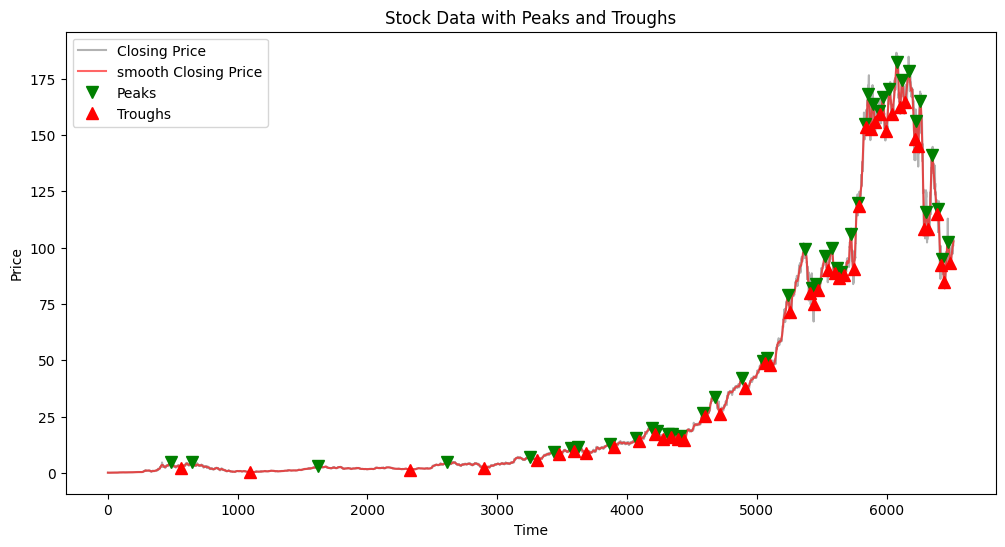

In [22]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df.index, df['close'], label='Closing Price', color='grey', alpha=0.6)
ax.plot(df.index, df['close_smooth'], label='smooth Closing Price', color='red', alpha=0.6)
ax.plot(peaks, df['close_smooth'].iloc[peaks], 'v', color='green', markersize=8, label='Peaks')
ax.plot(troughs, df['close_smooth'].iloc[troughs], '^', color='red', markersize=8, label='Troughs')

plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Stock Data with Peaks and Troughs')
plt.legend()
plt.show()
